In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, average_precision_score
import numpy as np
from sklearn import metrics
from collections import Counter
from sklearn.linear_model import LogisticRegression
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("nts_data.csv")

In [3]:
df

,mode_main,distance,density,age,male,ethnicity,education,income,cars,license,bicycles,weekend,diversity,green,temp,precip,wind
0,walk,1.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
1,walk,10.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
2,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
3,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
4,car,61.5,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230603,bike,5.0,0.92743,59,no,native,lower,20to40,1,yes,1,yes,2.29996,57.150087,11.9,0.90,7.8
230604,bike,2.0,0.92743,59,no,native,lower,20to40,1,yes,1,yes,2.29996,57.150087,11.9,0.90,7.8
230605,car,2.0,0.94175,57,no,native,lower,20to40,1,yes,2,yes,2.09674,71.413992,12.1,1.40,6.4
230606,car,8.0,0.94175,57,no,native,lower,20to40,1,yes,2,yes,2.09674,71.413992,12.1,1.40,6.4


In [4]:
value_counts = df['mode_main'].value_counts()
print(value_counts)

mode_main
car     127439
bike     56298
walk     37571
pt        9300
Name: count, dtype: int64


In [5]:
df.describe()

,distance,density,age,cars,bicycles,diversity,green,temp,precip,wind
count,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000
mean,12.217913,1.569055,47.661356,1.382584,3.357134,1.774927,54.939470,13.316930,2.184633,4.097702
std,23.545686,1.593292,15.934884,0.822056,1.936614,0.493037,22.172372,7.565732,4.674801,1.914821
min,0.100000,0.001840,18.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.400000
25%,1.500000,0.591320,36.000000,1.000000,2.000000,1.388940,37.111200,8.000000,0.000000,2.700000
50%,4.000000,1.153210,47.000000,1.000000,3.000000,1.827390,54.102123,13.400000,0.100000,3.800000
75%,12.000000,1.952960,60.000000,2.000000,4.000000,2.172380,74.381844,19.000000,2.300000,5.100000
max,400.000000,11.442960,98.000000,10.000000,10.000000,2.827560,97.813002,35.900000,142.300000,16.300000


In [6]:
print(df.columns)

Index(['mode_main', 'distance', 'density', 'age', 'male', 'ethnicity',
       'education', 'income', 'cars', 'license', 'bicycles', 'weekend',
       'diversity', 'green', 'temp', 'precip', 'wind'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230608 entries, 0 to 230607
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   mode_main  230608 non-null  object 
 1   distance   230608 non-null  float64
 2   density    230608 non-null  float64
 3   age        230608 non-null  int64  
 4   male       230608 non-null  object 
 5   ethnicity  230608 non-null  object 
 6   education  230608 non-null  object 
 7   income     230608 non-null  object 
 8   cars       230608 non-null  int64  
 9   license    230608 non-null  object 
 10  bicycles   230608 non-null  int64  
 11  weekend    230608 non-null  object 
 12  diversity  230608 non-null  float64
 13  green      230608 non-null  float64
 14  temp       230608 non-null  float64
 15  precip     230608 non-null  float64
 16  wind       230608 non-null  float64
dtypes: float64(7), int64(3), object(7)
memory usage: 29.9+ MB


In [8]:
df.isnull().any()

mode_main    False
distance     False
density      False
age          False
male         False
ethnicity    False
education    False
income       False
cars         False
license      False
bicycles     False
weekend      False
diversity    False
green        False
temp         False
precip       False
wind         False
dtype: bool

<Axes: xlabel='age', ylabel='distance'>

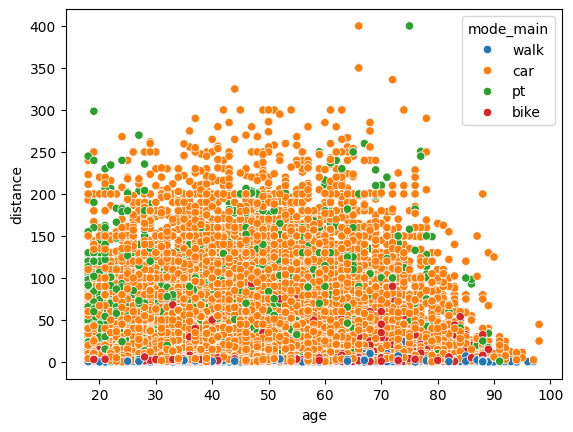

In [18]:
sns.scatterplot(x='age', y='distance', hue="mode_main", data=df)

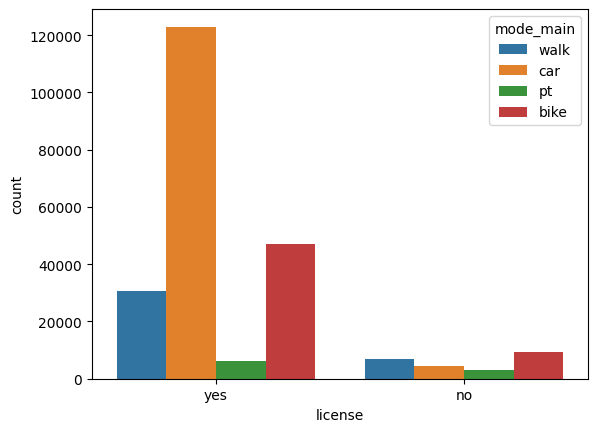

In [27]:
sns.countplot(x='license', data=df, hue="mode_main")
plt.show()

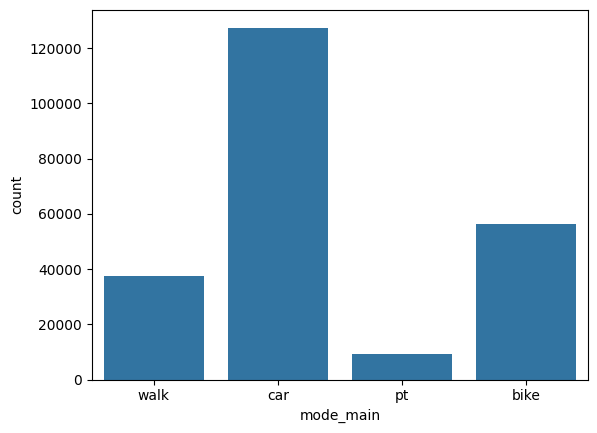

In [29]:
sns.countplot(x='mode_main', data=df)
plt.show()

In [21]:
percentage_mode = (df['mode_main'].value_counts(normalize=True) * 100).reset_index()
print(percentage_mode)

  mode_main  proportion
0       car   58.669935
1      bike   22.401071
2      walk   14.223154
3        pt    4.705840


<Axes: xlabel='age', ylabel='distance'>

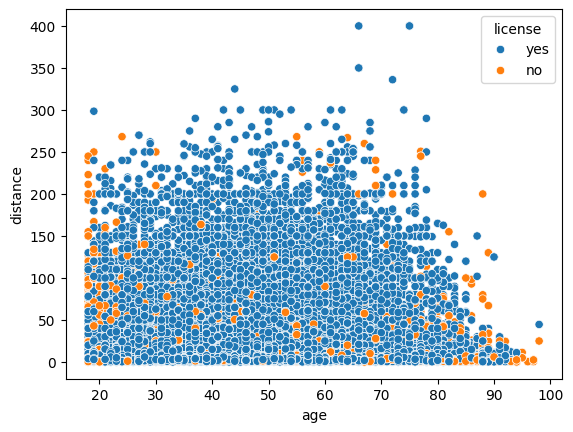

In [25]:
sns.scatterplot(x='age', y='distance', hue="license", data=df)

<Axes: xlabel='precip', ylabel='distance'>

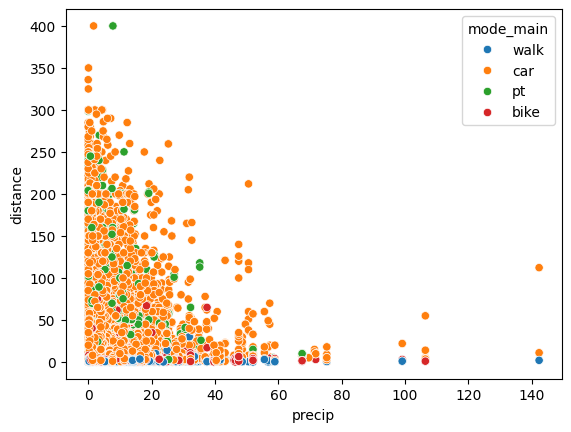

In [33]:
sns.scatterplot(x='precip', y='distance', hue="mode_main", data=df)

<Axes: xlabel='wind', ylabel='distance'>

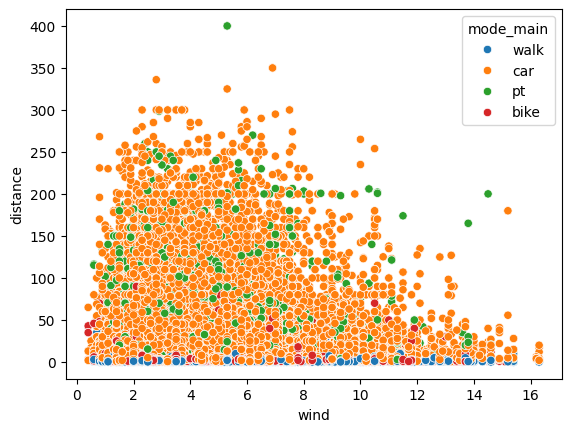

In [34]:
sns.scatterplot(x='wind', y='distance', hue="mode_main", data=df)

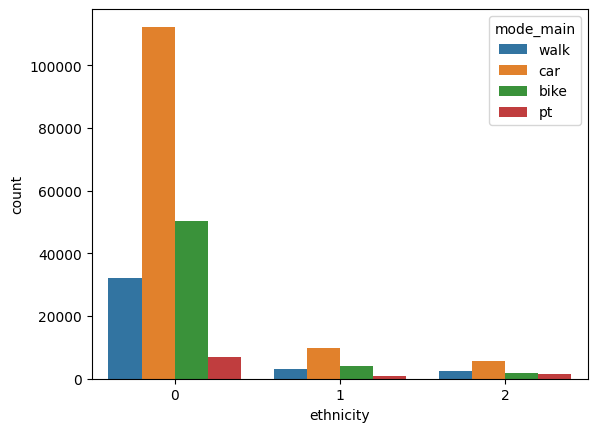

In [11]:
sns.countplot(x='ethnicity', data=df, hue="mode_main")
plt.show()

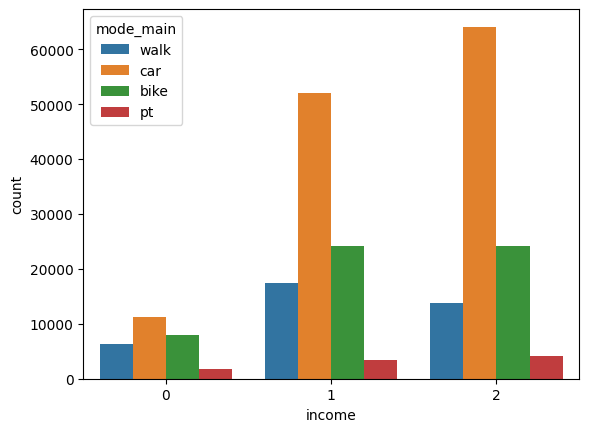

In [32]:
sns.countplot(x='income', data=df, hue="mode_main")
plt.show()

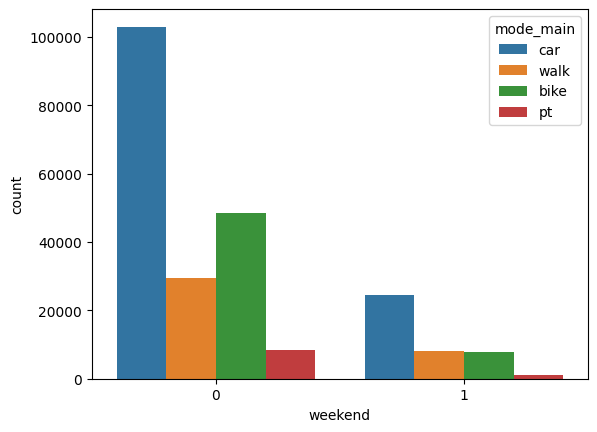

In [28]:
sns.countplot(x='weekend', data=df, hue="mode_main")
plt.show()

In [4]:
mapping = {
  "no":0,	
  "yes":1
}

df['weekend'] = df['weekend'].map(mapping)

In [5]:
mapping = {
   "less20":0,
   "20to40":1,
   "more40":2
}

df['income'] = df['income'].map(mapping)

In [6]:
mapping = {
   "native":0,
   "western":1,
   "nonwestern":2
}

df['ethnicity'] = df['ethnicity'].map(mapping)

In [7]:
mapping = {
   "lower":0,
   "middle":1,
   "higher":2
}

df['education'] = df['education'].map(mapping)

In [8]:
mapping = {
  "no":0,	
  "yes":1
}

df['male'] = df['male'].map(mapping)

In [9]:
mapping = {
  "no":0,	
  "yes":1
}

df['license'] = df['license'].map(mapping)

In [10]:
mapping = {
"bike": 0,
"car" : 1,
"pt" : 2,
"walk": 3
}

df['mode_main'] = df['mode_main'].map(mapping)

<Axes: >

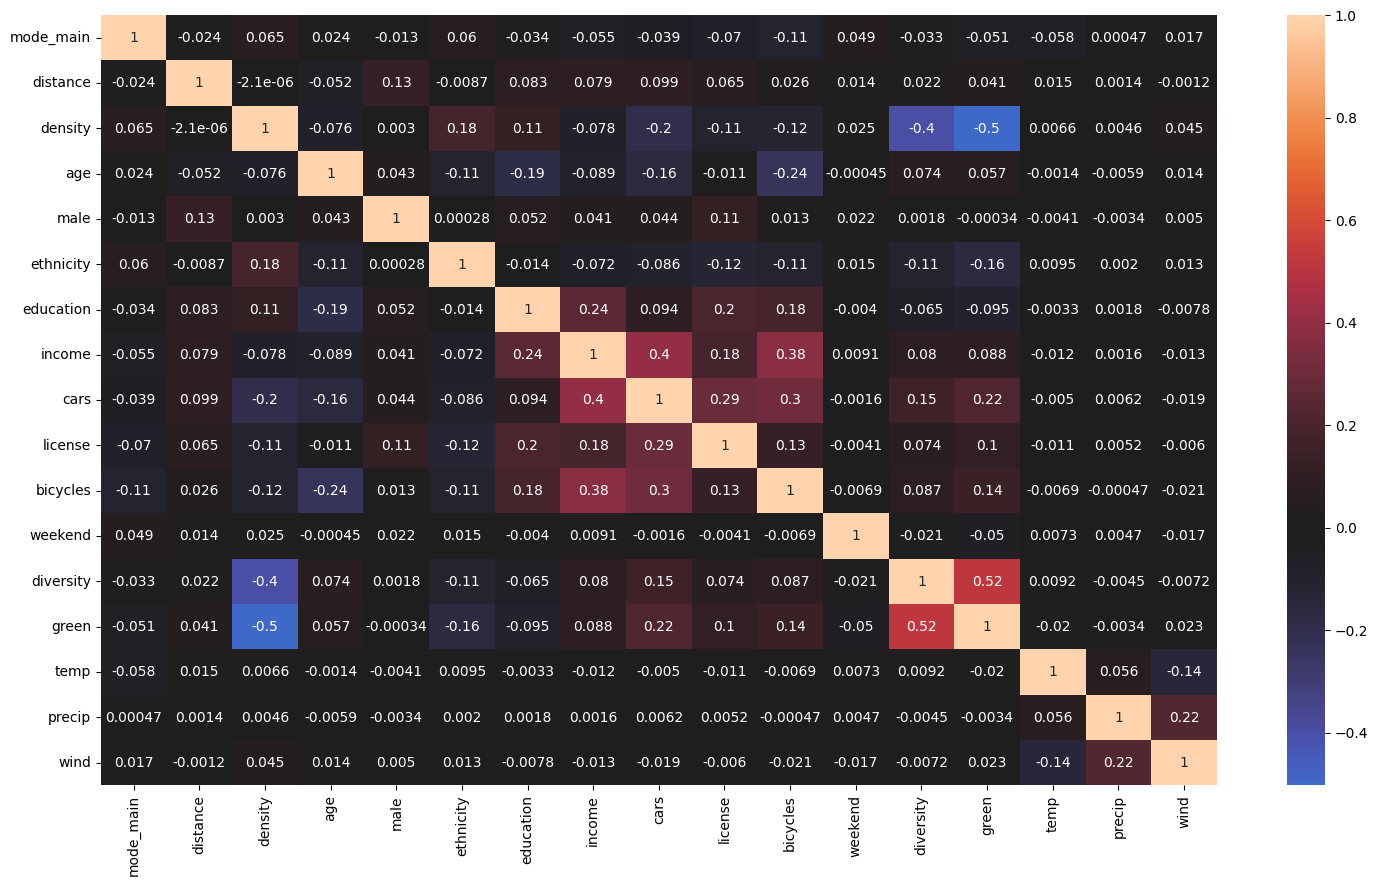

In [134]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [11]:
dro=["mode_main"]
X = df.drop(dro, axis=1) 
y = df["mode_main"]
X

,distance,density,age,male,ethnicity,education,income,cars,license,bicycles,weekend,diversity,green,temp,precip,wind
0,1.0,1.26259,84,0,0,0,0,0,1,1,1,1.24604,26.881233,0.1,0.10,3.0
1,10.0,1.26259,84,0,0,0,0,0,1,1,1,1.24604,26.881233,0.1,0.10,3.0
2,3.0,1.76264,27,1,1,1,1,1,1,2,1,1.53959,36.045955,-3.4,0.05,1.8
3,3.0,1.76264,27,1,1,1,1,1,1,2,1,1.53959,36.045955,-3.4,0.05,1.8
4,61.5,1.76264,27,1,1,1,1,1,1,2,1,1.53959,36.045955,-3.4,0.05,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230603,5.0,0.92743,59,0,0,0,1,1,1,1,1,2.29996,57.150087,11.9,0.90,7.8
230604,2.0,0.92743,59,0,0,0,1,1,1,1,1,2.29996,57.150087,11.9,0.90,7.8
230605,2.0,0.94175,57,0,0,0,1,1,1,2,1,2.09674,71.413992,12.1,1.40,6.4
230606,8.0,0.94175,57,0,0,0,1,1,1,2,1,2.09674,71.413992,12.1,1.40,6.4


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =23)

In [13]:
X_train.shape, y_train.shape

((207547, 16), (207547,))

In [14]:
X_test.shape, y_test.shape

((23061, 16), (23061,))

# LOGISTIC REGRESSION 

In [166]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler(random_state=42)),  
    ('classifier', LogisticRegression(penalty = "l2"))  
])

param_grid = {
    'classifier__C': [0.001, 0.01]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)

In [167]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1, param_grid={'classifier__C': [0.001, 0.01]},
             scoring='f1_macro')

In [168]:
results_log = pd.DataFrame({
    'Params': [str(params) for params in grid_search.cv_results_['params']],
    'Mean Validation Score': grid_search.cv_results_['mean_test_score'],
    'Rank': grid_search.cv_results_['rank_test_score']
})
results_log = results_log.sort_values(by='Mean Validation Score', ascending=False)

In [169]:
print("Top 10 Validation Scores and Parameters:")
print(results_log[['Params', 'Mean Validation Score']].head(10))

Top 10 Validation Scores and Parameters:
                     Params  Mean Validation Score
1   {'classifier__C': 0.01}               0.461585
0  {'classifier__C': 0.001}               0.436666


In [170]:
y_pred = grid_search.predict(X_test)

In [171]:
log_report_test = classification_report(y_test, y_pred)
print( log_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.43      0.46      0.44      5747
           1       0.86      0.50      0.63     12580
           2       0.24      0.65      0.35       945
           3       0.33      0.62      0.43      3789

    accuracy                           0.51     23061
   macro avg       0.46      0.56      0.46     23061
weighted avg       0.64      0.51      0.54     23061



# DECISION TREE

In [15]:
dt_model = DecisionTreeClassifier(random_state=42)

In [16]:
pipeline = Pipeline(steps = [
    ('under_sampler', RandomUnderSampler(random_state=42)),
    ('classifier', dt_model)
])

In [17]:
param_grid = {
    'classifier__max_depth': list(range(3, 40)),
}

In [18]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24, 25,
                                                   26, 27, 28, 29, 30, 31, 32, ...]},
             scoring='f1_macro')

In [20]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

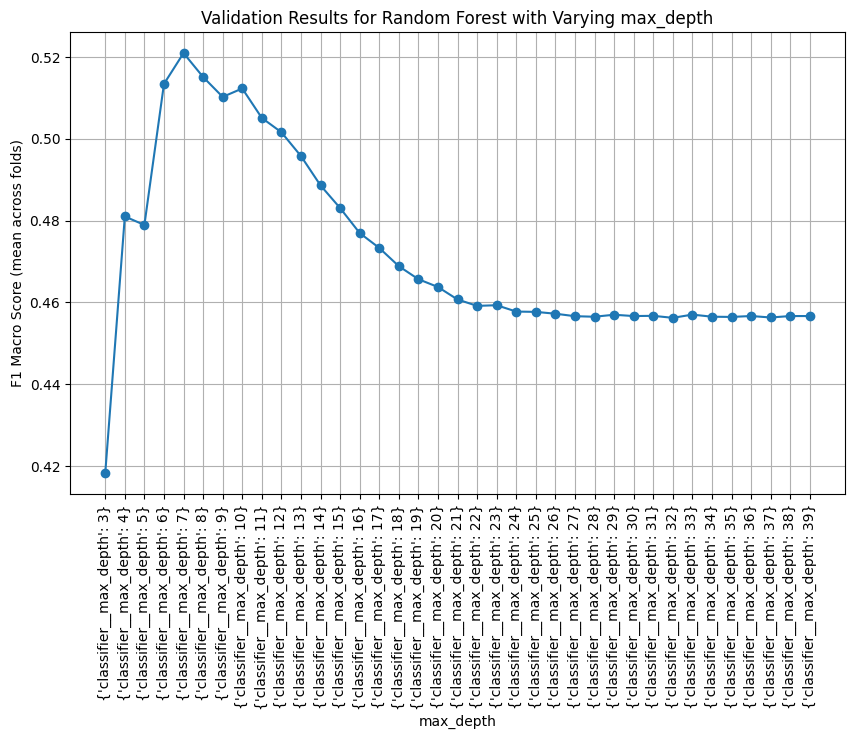

In [21]:
max_depth_values = [str(params) for params in grid_search.cv_results_['params']]
mean_f1_macro_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_f1_macro_scores, marker='o', linestyle='-')
plt.title('Validation Results for Random Forest with Varying max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro Score (mean across folds)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [22]:
results_df = pd.DataFrame({
    'Params': [str(params) for params in grid_search.cv_results_['params']],
    'Mean Validation Score': grid_search.cv_results_['mean_test_score'],
    'Rank': grid_search.cv_results_['rank_test_score']
})
results_df = results_df.sort_values(by='Mean Validation Score', ascending=False)

In [23]:
print("Top 10 Validation Scores and Parameters:")
print(results_df[['Params', 'Mean Validation Score']].head(10))

Top 10 Validation Scores and Parameters:
                           Params  Mean Validation Score
4    {'classifier__max_depth': 7}               0.520911
5    {'classifier__max_depth': 8}               0.515070
3    {'classifier__max_depth': 6}               0.513378
7   {'classifier__max_depth': 10}               0.512263
6    {'classifier__max_depth': 9}               0.510205
8   {'classifier__max_depth': 11}               0.505069
9   {'classifier__max_depth': 12}               0.501571
10  {'classifier__max_depth': 13}               0.495756
11  {'classifier__max_depth': 14}               0.488588
12  {'classifier__max_depth': 15}               0.483062


In [24]:
print(best_params)

{'classifier__max_depth': 7}


In [25]:
y_pred = best_model.predict(X_test)

In [29]:
y_pred_train = best_model.predict(X_train)
tree_report_train = classification_report(y_train, y_pred_train)
print('depth = 17:', tree_report_train, sep='\n')

depth = 17:
              precision    recall  f1-score   support

           0       0.44      0.54      0.49     50551
           1       0.83      0.58      0.68    114859
           2       0.22      0.74      0.34      8355
           3       0.52      0.57      0.54     33782

    accuracy                           0.57    207547
   macro avg       0.50      0.61      0.51    207547
weighted avg       0.66      0.57      0.60    207547



In [30]:
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.44      0.54      0.49      5747
           1       0.82      0.58      0.68     12580
           2       0.22      0.74      0.34       945
           3       0.51      0.55      0.53      3789

    accuracy                           0.57     23061
   macro avg       0.50      0.60      0.51     23061
weighted avg       0.65      0.57      0.59     23061



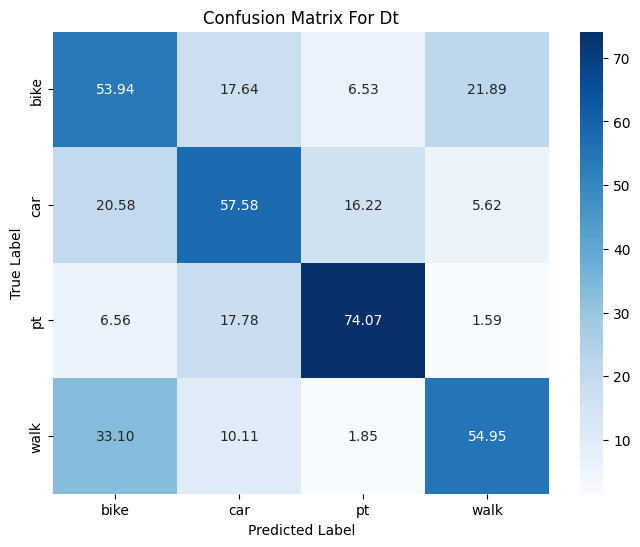

In [32]:
conf_matrix_tree = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_labels = ["bike", "car", "pt", "walk"]
class_accuracies = np.diag(conf_matrix_tree) / conf_matrix_tree.sum(axis=1)
conf_matrix_percentages_tree = (conf_matrix_tree.T / conf_matrix_tree.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_tree, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix For Dt')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
print(y_pred_prob_tree)

[1 0 1 ... 2 3 3]


In [30]:
y_test_bin = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin, class_probabilities_tree, average="micro")

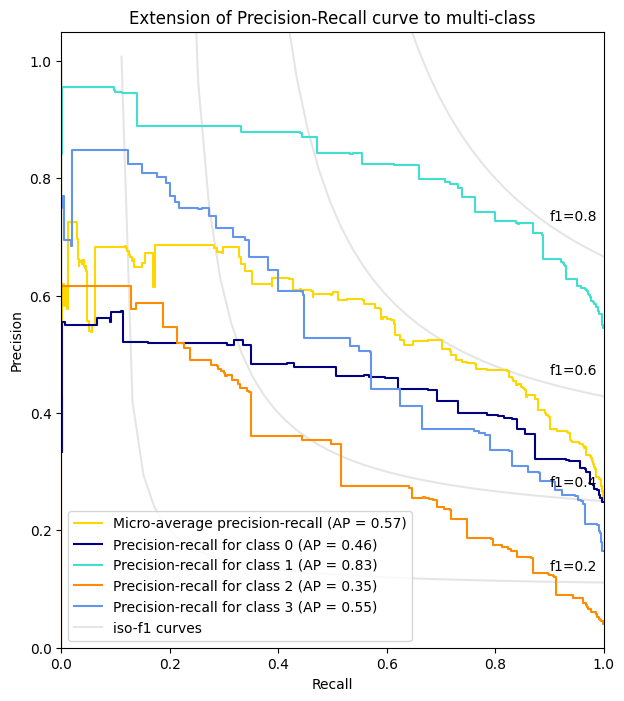

In [31]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(best_model.classes_)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# RANDOM FOREST

# MAX FEATURES TRIAL

In [93]:
rf_model = RandomForestClassifier(random_state=42)

In [94]:
pipeline = Pipeline(steps = [
    ('under_sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', rf_model)
])

In [95]:
param_grid = {
    'classifier__max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
}

In [96]:
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)

In [97]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17]},
             scoring='f1_macro')

In [98]:
best_params = grid_search_rf.best_params_
best_model = grid_search_rf.best_estimator_

In [99]:
print(best_params)

{'classifier__max_features': 3}


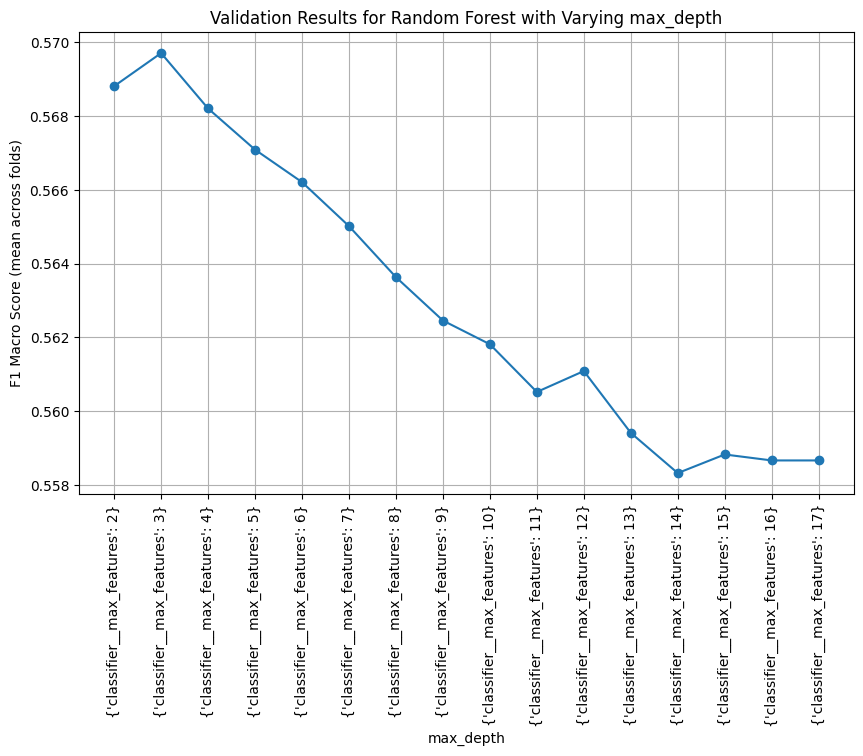

In [100]:
features_values = [str(params) for params in grid_search_rf.cv_results_['params']]
mean_f1_macro_scores = grid_search_rf.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(features_values, mean_f1_macro_scores, marker='o', linestyle='-')
plt.title('Validation Results for Random Forest with Varying max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro Score (mean across folds)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [101]:
results_rf = pd.DataFrame({
    'Params': [str(params) for params in grid_search_rf.cv_results_['params']],
    'Mean Validation Score': grid_search_rf.cv_results_['mean_test_score'],
    'Rank': grid_search_rf.cv_results_['rank_test_score']
})
results_rf = results_rf.sort_values(by='Mean Validation Score', ascending=False)

In [102]:
print("Top 10 Validation Scores and Parameters:")
print(results_rf[['Params', 'Mean Validation Score']].head(10))

Top 10 Validation Scores and Parameters:
                              Params  Mean Validation Score
1    {'classifier__max_features': 3}               0.569704
0    {'classifier__max_features': 2}               0.568808
2    {'classifier__max_features': 4}               0.568204
3    {'classifier__max_features': 5}               0.567088
4    {'classifier__max_features': 6}               0.566208
5    {'classifier__max_features': 7}               0.565016
6    {'classifier__max_features': 8}               0.563634
7    {'classifier__max_features': 9}               0.562459
8   {'classifier__max_features': 10}               0.561816
10  {'classifier__max_features': 12}               0.561090


# NUMBER OF ESTIMATORS TRIAL

In [103]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
}

In [104]:
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)

In [105]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__n_estimators': [50, 100, 150, 200, 250,
                                                      300, 350, 400, 450,
                                                      500]},
             scoring='f1_macro')

In [106]:
best_params = grid_search_rf.best_params_
best_model = grid_search_rf.best_estimator_

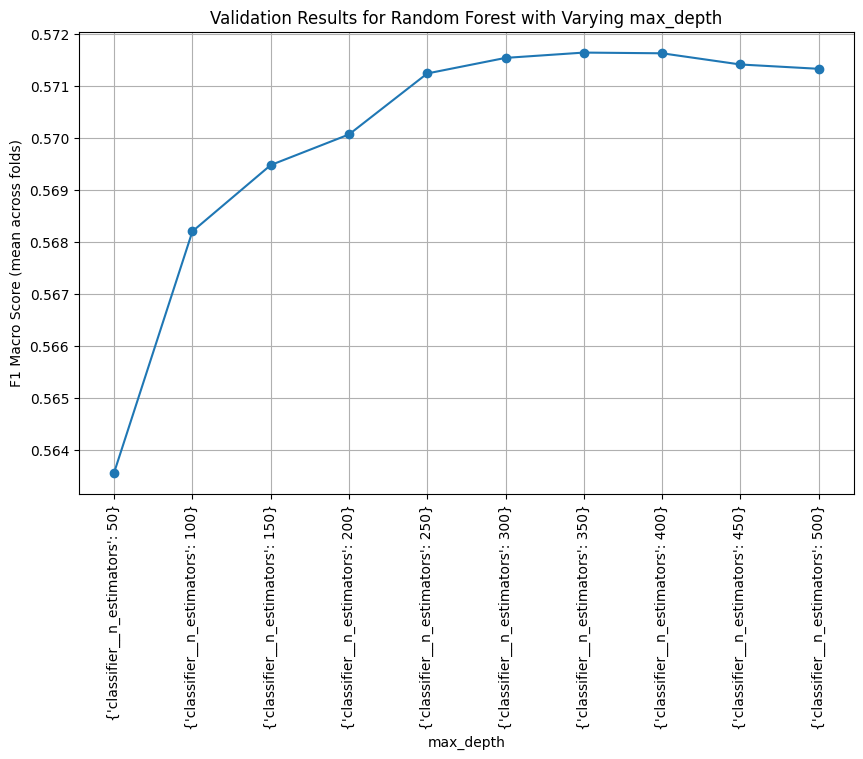

In [107]:
estimators_values = [str(params) for params in grid_search_rf.cv_results_['params']]
mean_f1_macro_scores = grid_search_rf.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(estimators_values, mean_f1_macro_scores, marker='o', linestyle='-')
plt.title('Validation Results for Random Forest with Varying max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro Score (mean across folds)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [108]:
results_rf = pd.DataFrame({
    'Params': [str(params) for params in grid_search_rf.cv_results_['params']],
    'Mean Validation Score': grid_search_rf.cv_results_['mean_test_score'],
    'Rank': grid_search_rf.cv_results_['rank_test_score']
})
results_rf = results_rf.sort_values(by='Mean Validation Score', ascending=False)

In [109]:
print("Top 10 Validation Scores and Parameters:")
print(results_rf[['Params', 'Mean Validation Score']].head(10))

Top 10 Validation Scores and Parameters:
                              Params  Mean Validation Score
6  {'classifier__n_estimators': 350}               0.571645
7  {'classifier__n_estimators': 400}               0.571631
5  {'classifier__n_estimators': 300}               0.571543
8  {'classifier__n_estimators': 450}               0.571416
9  {'classifier__n_estimators': 500}               0.571333
4  {'classifier__n_estimators': 250}               0.571243
3  {'classifier__n_estimators': 200}               0.570069
2  {'classifier__n_estimators': 150}               0.569480
1  {'classifier__n_estimators': 100}               0.568204
0   {'classifier__n_estimators': 50}               0.563561


# MAX SAMPLES TRIAL 

In [237]:
param_grid = {
    'classifier__max_samples': [0.5,0.6,0.7, 0.8, 0.9, None]
}

In [238]:
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_samples': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                     None]},
             scoring='f1_macro')

In [239]:
best_params = grid_search_rf.best_params_
best_model = grid_search_rf.best_estimator_

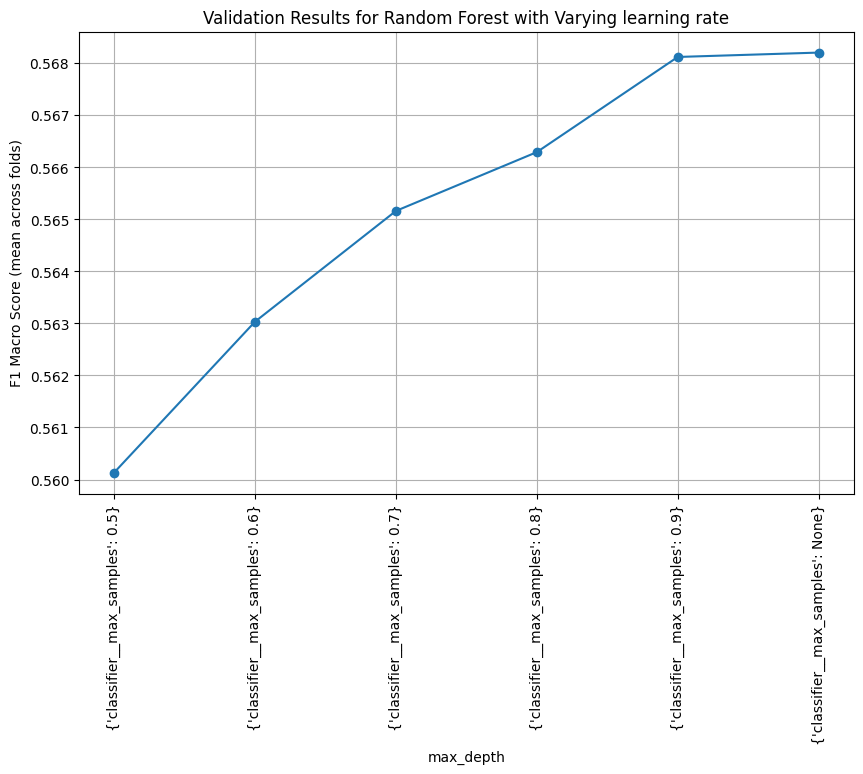

In [240]:
values = [str(params) for params in grid_search_rf.cv_results_['params']]
mean_f1_macro_scores = grid_search_rf.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(values, mean_f1_macro_scores, marker='o', linestyle='-')
plt.title('Validation Results for Random Forest with Varying learning rate')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro Score (mean across folds)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# FINAL BUILD

In [110]:
param_grid = {
    'classifier__n_estimators': [350, 400],
    'classifier__max_features': [2, 3, 4],
}

In [111]:
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [2, 3, 4],
                         'classifier__n_estimators': [350, 400]},
             scoring='f1_macro')

In [112]:
best_params = grid_search_rf.best_params_
best_model = grid_search_rf.best_estimator_

In [113]:
top_results_indices = np.argsort(grid_search_rf.cv_results_['mean_test_score'])[::-1][:10]
top_10_f1_macro_scores = grid_search_rf.cv_results_['mean_test_score'][top_results_indices]
for i, f1_macro_score in enumerate(top_10_f1_macro_scores, 1):
    print(f"Rank {i}: F1 Macro Score = {f1_macro_score:.4f}")

Rank 1: F1 Macro Score = 0.5740
Rank 2: F1 Macro Score = 0.5736
Rank 3: F1 Macro Score = 0.5728
Rank 4: F1 Macro Score = 0.5724
Rank 5: F1 Macro Score = 0.5716
Rank 6: F1 Macro Score = 0.5716


In [114]:
print(best_params)

{'classifier__max_features': 2, 'classifier__n_estimators': 400}


In [115]:
y_pred_rf = best_model.predict(X_test)
rf_report_test = classification_report(y_test, y_pred_rf)
print(rf_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.56      0.59      0.57      5747
           1       0.87      0.63      0.73     12580
           2       0.30      0.89      0.45       945
           3       0.51      0.67      0.58      3789

    accuracy                           0.64     23061
   macro avg       0.56      0.70      0.58     23061
weighted avg       0.71      0.64      0.65     23061



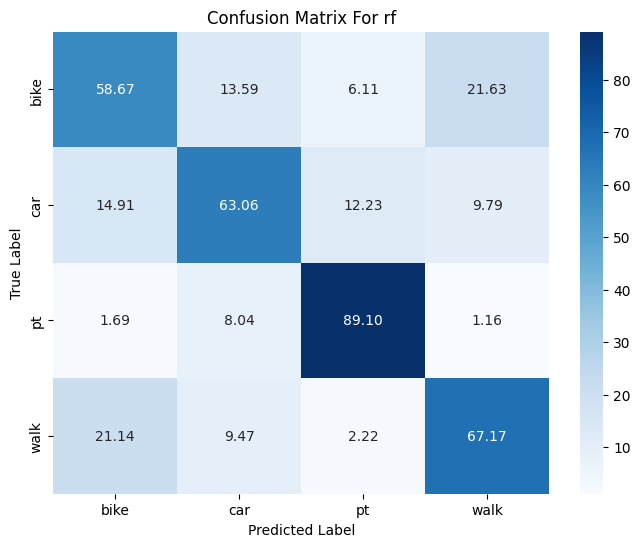

In [116]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix For rf')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [117]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)

In [118]:
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")

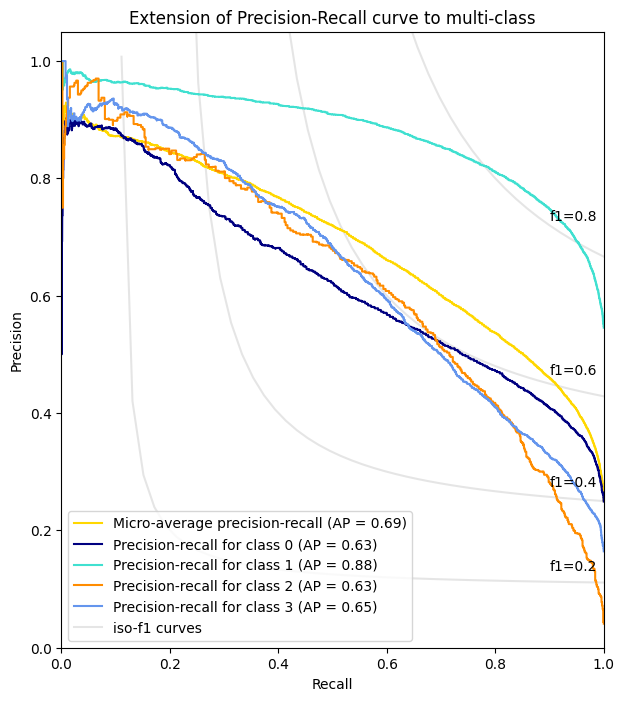

In [119]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

# LIGHTGBM

# LEARNING RATE

In [241]:
pipeline = Pipeline(steps = [
    ('under_sampler', RandomUnderSampler(random_state=42, sampling_strategy = "auto")), 
    ('classifier', lgb.LGBMClassifier(random_state=42, verbose = 0))
])

In [242]:
param_grid = {
    'classifier__n_estimators': [300,400,500],
    'classifier__max_depth': [3, 5, 7, 10, 15],
    'classifier__min_child_weight': [1, 3, 5, 7],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

In [ ]:
grid_search_lg = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_lg.fit(X_train, y_train)

In [101]:
best_params = grid_search_lg.best_params_
best_model = grid_search_lg.best_estimator_

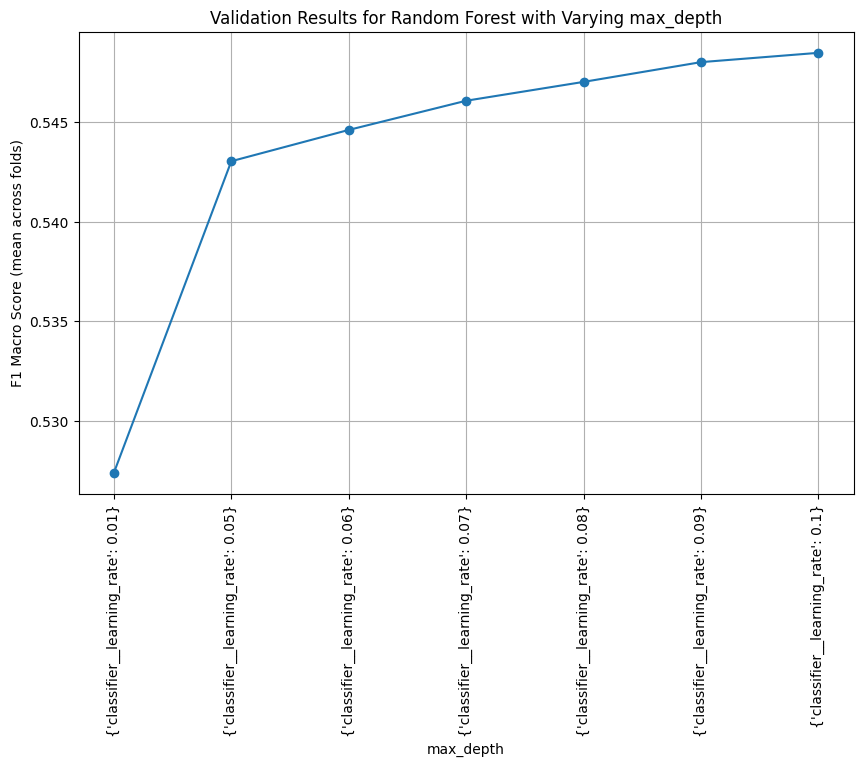

In [103]:
values = [str(params) for params in grid_search_lg.cv_results_['params']]
mean_f1_macro_scores = grid_search_lg.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(values, mean_f1_macro_scores, marker='o', linestyle='-')
plt.title('Validation Results for Random Forest with Varying max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro Score (mean across folds)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# Number of estimators

In [114]:
param_grid = {
    'classifier__n_estimators': [800, 900, 1000, 1100]
}

In [115]:
grid_search_lg = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_lg.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        LGBMClassifier(random_state=42,
                                                       verbose=0))]),
             n_jobs=-1,
             param_grid={'classifier__n_estimators': [800, 900, 1000, 1100]},
             scoring='f1_macro')

In [116]:
best_params = grid_search_lg.best_params_
best_model = grid_search_lg.best_estimator_

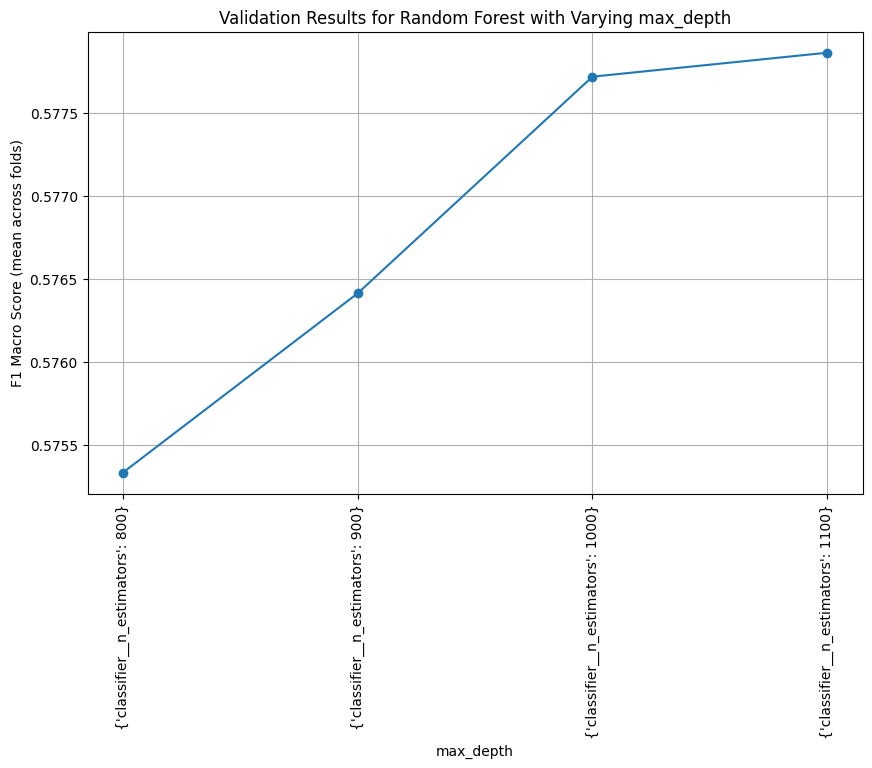

In [117]:
values = [str(params) for params in grid_search_lg.cv_results_['params']]
mean_f1_macro_scores = grid_search_lg.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(values, mean_f1_macro_scores, marker='o', linestyle='-')
plt.title('Validation Results for Random Forest with Varying max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro Score (mean across folds)')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [118]:
results_lg = pd.DataFrame({
    'Params': [str(params) for params in grid_search_lg.cv_results_['params']],
    'Mean Validation Score': grid_search_lg.cv_results_['mean_test_score'],
    'Rank': grid_search_lg.cv_results_['rank_test_score']
})
results_lg = results_lg.sort_values(by='Mean Validation Score', ascending=False)

In [119]:
print("Top  Validation Scores and Parameters:")
print(results_lg[['Params', 'Mean Validation Score']].head(10))

Top  Validation Scores and Parameters:
                               Params  Mean Validation Score
3  {'classifier__n_estimators': 1100}               0.577861
2  {'classifier__n_estimators': 1000}               0.577717
1   {'classifier__n_estimators': 900}               0.576413
0   {'classifier__n_estimators': 800}               0.575335


In [120]:
param_grid = {
    'classifier__lambda_l1': [0, 0.1, 1],
}

In [121]:
grid_search_lg = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_lg.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        LGBMClassifier(random_state=42,
                                                       verbose=0))]),
             n_jobs=-1, param_grid={'classifier__lambda_l1': [0, 0.1, 1]},
             scoring='f1_macro')

In [122]:
best_params = grid_search_lg.best_params_
best_model = grid_search_lg.best_estimator_

In [123]:
results_lg = pd.DataFrame({
    'Params': [str(params) for params in grid_search_lg.cv_results_['params']],
    'Mean Validation Score': grid_search_lg.cv_results_['mean_test_score'],
    'Rank': grid_search_lg.cv_results_['rank_test_score']
})
results_lg = results_lg.sort_values(by='Mean Validation Score', ascending=False)

In [124]:
print(best_params)

{'classifier__lambda_l1': 0.1}


# Final

In [279]:
param_grid = {
    'classifier__learning_rate': [0.1],
    'classifier__n_estimators': [ 300, 350, 400, 450, 500],
    'classifier__lambda_l1': [0.1]
}

In [280]:
grid_search_lg = GridSearchCV(pipeline, param_grid, cv=10, scoring='recall_micro', n_jobs=-1)
grid_search_lg.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        LGBMClassifier(random_state=42,
                                                       verbose=0))]),
             n_jobs=-1,
             param_grid={'classifier__lambda_l1': [0.1],
                         'classifier__learning_rate': [0.1],
                         'classifier__n_estimators': [300, 350, 400, 500, 600]},
             scoring='recall_micro')

In [281]:
best_params = grid_search_lg.best_params_
best_model = grid_search_lg.best_estimator_

In [282]:
results_lg = pd.DataFrame({
    'Params': [str(params) for params in grid_search_lg.cv_results_['params']],
    'Mean Validation Score': grid_search_lg.cv_results_['mean_test_score'],
    'Rank': grid_search_lg.cv_results_['rank_test_score']
})
results_lg = results_lg.sort_values(by='Mean Validation Score', ascending=False)

In [283]:
print(best_params)

{'classifier__lambda_l1': 0.1, 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 600}


In [284]:
y_pred_lg = best_model.predict(X_test)
lg_report_test = classification_report(y_test, y_pred_lg)
print(lg_report_test, sep='\n')

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
              precision    recall  f1-score   support

           0       0.54      0.61      0.57      5747
           1       0.86      0.63      0.73     12580
           2       0.31      0.86      0.45       945
           3       0.52      0.65      0.58      3789

    accuracy                           0.64     23061
   macro avg       0.56      0.69      0.58     23061
weighted avg       0.70      0.64      0.65     23061



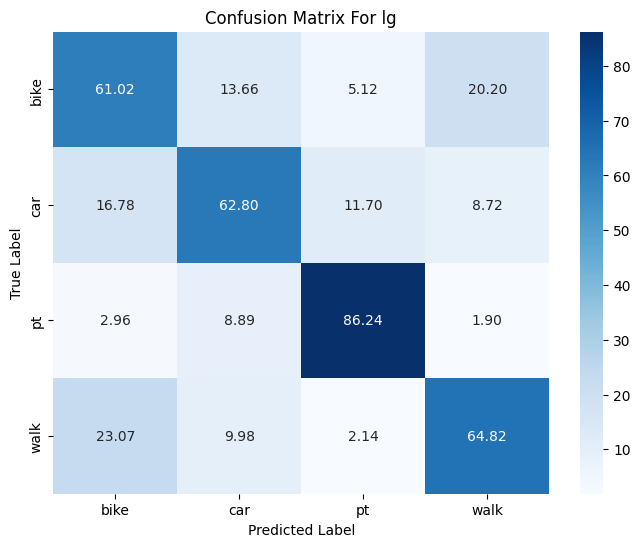

In [286]:
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_lg) / conf_matrix_lg.sum(axis=1)
conf_matrix_percentages_lg = (conf_matrix_lg.T / conf_matrix_lg.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_lg, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix For lg')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [288]:
class_probabilities_lg = best_model.predict_proba(X_test)
y_pred_prob_lg = np.argmax(class_probabilities_lg, axis=1)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1


In [289]:
y_test_bin_lg = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_lg[:, i], class_probabilities_lg[:, i])
    average_precision[i] = average_precision_score(y_test_bin_lg[:, i], class_probabilities_lg[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_lg.ravel(), class_probabilities_lg.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_lg, class_probabilities_lg, average="micro")

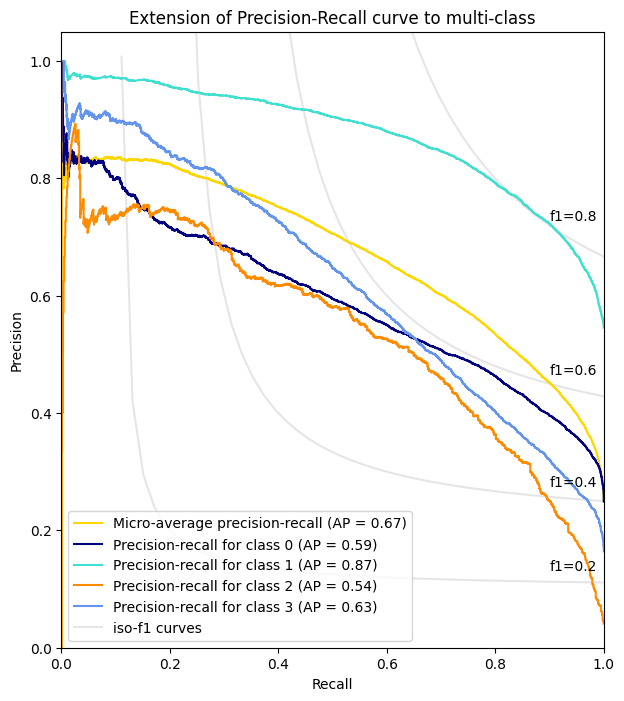

In [290]:
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(len(class_labels)), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()